In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 1. Read the dataset to the python environment.

In [2]:
df = pd.read_excel('iris (3).xls')

# 2. Do necessary pre-processing steps.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#checking for null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
#there are missing values which we can fill by mean or median

In [6]:
for i in ['SL','SW','PL']:
    df[i]=df[i].fillna(df[i].median())

In [7]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [8]:
#null values filled

In [9]:
#describing the data
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for outliers

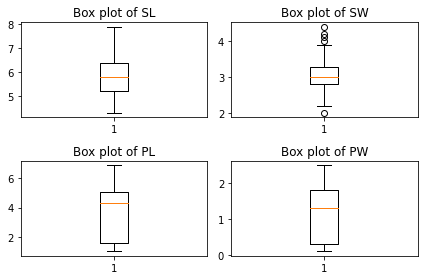

In [10]:
#boxplot for SL column
plt.subplot(2,2,1)
plt.boxplot(df['SL'])
plt.title('Box plot of SL')

#boxplot for SW column
plt.subplot(2,2,2)
plt.boxplot(df['SW'])
plt.title('Box plot of SW')

#boxplot for PL column
plt.subplot(2,2,3)
plt.boxplot(df['PL'])
plt.title('Box plot of PL')

#boxplot for PW column
plt.subplot(2,2,4)
plt.boxplot(df['PW'])
plt.title('Box plot of PW')

plt.tight_layout()
plt.show()

Here we can see that only SW has outliers

In [11]:
Q1=np.percentile(df['SW'],25)
Q3=np.percentile(df['SW'],75)
print ('Q1 =',Q1,'Q3 =',Q3)
#calculating the inter quartile range
IQR=Q3-Q1
print('IQR =',IQR)
#calculating the upper and lower limits
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit =',low_lim,'\n upper limit =',upper_lim)

Q1 = 2.8 Q3 = 3.275
IQR = 0.4750000000000001
lower limit = 2.0874999999999995 
 upper limit = 3.9875


Removing Outliers

In [12]:
df['SW'] = np.where(df['SW']>upper_lim,upper_lim,
                    np.where(df['SW']<low_lim,low_lim,df['SW']))

In [13]:
df['SW'] = np.where(df['SW']>upper_lim,upper_lim,
                    np.where(df['SW']<low_lim,low_lim,df['SW']))

In [14]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


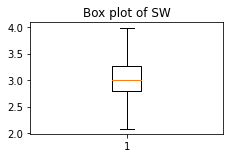

In [15]:
#boxplot for SW column
plt.subplot(2,2,2)
plt.boxplot(df['SW'])
plt.title('Box plot of SW')

plt.tight_layout()
plt.show()

Thus outliers are removed

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [16]:
#label encoding to convert them into numerical value
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [17]:
df['Classification']=enc.fit_transform(df['Classification'])
X=df.drop('Classification',axis=1)
y=df['Classification']

In [18]:
#spliting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score

KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_predict1=knnmodel.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_predict1))
confusion_matrix(y_test,y_predict1)

0.9473684210526315


array([[14,  1,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [37]:
#here the accuracy is not 100% so we can move to others

DecisionTree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
predy=dt.predict(X_test)

In [40]:
print(accuracy_score(y_test,predy))
confusion_matrix(y_test,predy)

1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
predy1=rf.predict(X_test)

In [42]:
print(accuracy_score(y_test,predy1))
confusion_matrix(y_test,predy1)

1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

The models of Decision Tree and Random forest are giving highest accuracy of 1, so these are some of the best fitting models